#Setting up Conda and Hugging face for dataset

In [ ]:
# !conda install pandas pyarrow

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [ ]:
# !conda install -c huggingface -c conda-forge datasets
# !conda install -c conda-forge fsspec
# !pip install hf_transfer

^C


In [ ]:
!pip install huggingface_hub

In [3]:
!huggingface-cli login

^C


# Downloading Dataset

In [4]:
import pandas as pd

splits = {'train': 'data/train-00000-of-00001.parquet', 'validation': 'data/validation-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/sdiaeyu6n/tu-berlin/" + splits["train"])

In [5]:
df.head()

,image,label
0,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,73
1,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,46
2,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,111
3,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,95
4,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,74


In [13]:
!pip install datasets

# Importing the Datset

In [18]:
from datasets import load_dataset

dataset = load_dataset("sdiaeyu6n/tu-berlin", split="train")

print(dataset.features)
print(dataset.shape)



{'image': Image(mode=None, decode=True, id=None), 'label': ClassLabel(names=['airplane', 'alarm clock', 'angel', 'ant', 'apple', 'arm', 'armchair', 'ashtray', 'axe', 'backpack', 'banana', 'barn', 'baseball bat', 'basket', 'bathtub', 'bear (animal)', 'bed', 'bee', 'beer-mug', 'bell', 'bench', 'bicycle', 'binoculars', 'blimp', 'book', 'bookshelf', 'boomerang', 'bottle opener', 'bowl', 'brain', 'bread', 'bridge', 'bulldozer', 'bus', 'bush', 'butterfly', 'cabinet', 'cactus', 'cake', 'calculator', 'camel', 'camera', 'candle', 'cannon', 'canoe', 'car (sedan)', 'carrot', 'castle', 'cat', 'cell phone', 'chair', 'chandelier', 'church', 'cigarette', 'cloud', 'comb', 'computer monitor', 'computer-mouse', 'couch', 'cow', 'crab', 'crane (machine)', 'crocodile', 'crown', 'cup', 'diamond', 'dog', 'dolphin', 'donut', 'door', 'door handle', 'dragon', 'duck', 'ear', 'elephant', 'envelope', 'eye', 'eyeglasses', 'face', 'fan', 'feather', 'fire hydrant', 'fish', 'flashlight', 'floor lamp', 'flower with ste

# Mapping the Labels

In [19]:
label_names = dataset.features['label'].names

print(f"Number of classes: {len(label_names)}")
print(f"First few class names: {label_names[:5]}")

label_map = {i: name for i, name in enumerate(label_names)}

df['class_name'] = df['label'].map(label_map)

print(df[['label', 'class_name']].head())

Number of classes: 250
First few class names: ['airplane', 'alarm clock', 'angel', 'ant', 'apple']
   label      class_name
0     73             ear
1     46          carrot
2    111  human-skeleton
3     95          guitar
4     74        elephant


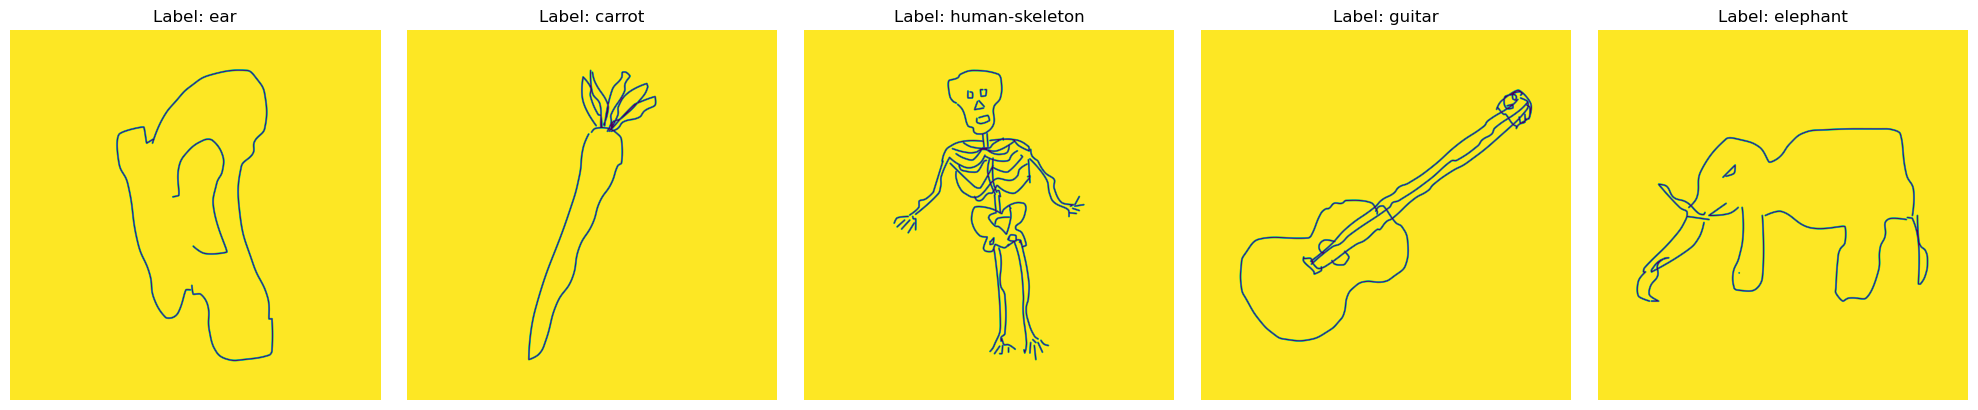

In [24]:
import matplotlib.pyplot as plt
from PIL import Image
import io

def display_image(image, label):
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Label: {label}")

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i in range(5):
    sample = dataset[i]
    image = sample['image']
    label = label_map[sample['label']]
    plt.subplot(1, 5, i+1)
    display_image(image, label)

plt.tight_layout()
plt.show()


In [1]:
df.head()

NameError: name 'df' is not defined

In [29]:
import numpy as np

# Check the contents of train_images.npz and train_labels.npz
images_path = "SketchClassifier/data/processed/train_images.npz"
labels_path = "SketchClassifier/data/processed/train_labels.npz"

with np.load(images_path) as images_data, np.load(labels_path) as labels_data:
    print("Images shape:", images_data['images'].shape)
    print("Labels shape:", labels_data['labels'].shape)


Images shape: (16000, 224, 224, 3)
Labels shape: (0,)


In [3]:
import torch

# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print(f"Is CUDA available? {cuda_available}")

# If CUDA is available, print the number of GPUs
if cuda_available:
    device_count = torch.cuda.device_count()
    print(f"Number of CUDA devices: {device_count}")
    for i in range(device_count):
        print(f"CUDA Device {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available.")

Is CUDA available? True
Number of CUDA devices: 1
CUDA Device 0: NVIDIA GeForce GTX 1650


In [1]:
!pip show torch torchvision torchaudio

In [12]:
!pip install mlflow


  Using cached mlflow-2.17.2-py3-none-any.whl.metadata (29 kB)
  Using cached mlflow_skinny-2.17.2-py3-none-any.whl.metadata (30 kB)
  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
  Using cached alembic-1.13.3-py3-none-any.whl.metadata (7.4 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.1-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached matplotlib-3.9.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached pyarrow-17.0.0-cp310-cp310-win_amd64.whl.metadata (3.4 kB)
  Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl.metadata (13 kB)
  Using cached SQLAlchemy-2.0.36-cp310-cp310-win_amd64.whl.metadata (9.9 kB)
  Using cached waitress-3.0.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached click-8.1.7-py3-none-any

In [ ]:
import sys
import os
from src.models.train_model import train_model
import yaml
config_path = os.path.join("", "config/config.yaml")
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

train_model(config)

TypeError: train_model() got an unexpected keyword argument 'verbose'

In [3]:
import numpy as np
import os
processed_dir = "data\processed"
    # Load processed training data
train_images_file = os.path.join(processed_dir, 'train_images.npz')
train_labels_file = os.path.join(processed_dir, 'train_labels.npz')
test_images_file = os.path.join(processed_dir, 'test_images.npz')
test_labels_file = os.path.join(processed_dir, 'test_labels.npz')

# Check if files exist
if not all(os.path.exists(file) for file in [train_images_file, train_labels_file, test_images_file, test_labels_file]):
    raise FileNotFoundError("Processed data files not found. Please run preprocess_data first.")

# Load train images and labels
train_images = np.load(train_images_file)['images']
train_labels = np.load(train_labels_file)['labels']

# Load test images and labels
test_images = np.load(test_images_file)['images']
test_labels = np.load(test_labels_file)['labels']

In [5]:
train_images_file = os.path.join(processed_dir, 'X_val.npz')
train_images = np.load(train_images_file)['images']

print(train_images.shape)


(19200, 224, 224)


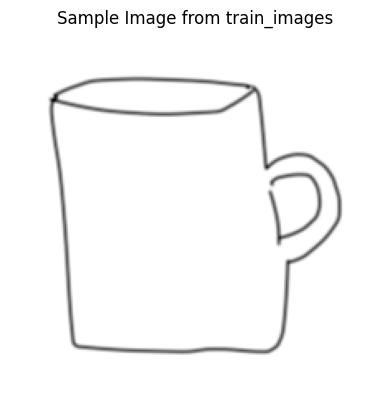

In [12]:
import matplotlib.pyplot as plt

# Assuming train_images is already a NumPy array with shape (16000, 224, 224)
# Displaying the first image in the dataset

# Select an image to display
sample_image = train_images[455]

# Display the image
plt.imshow(sample_image, cmap='gray')
plt.title("Sample Image from train_images")
plt.axis('off')  # Hide axes for a cleaner view
plt.show()


In [25]:
!pip install albumentations




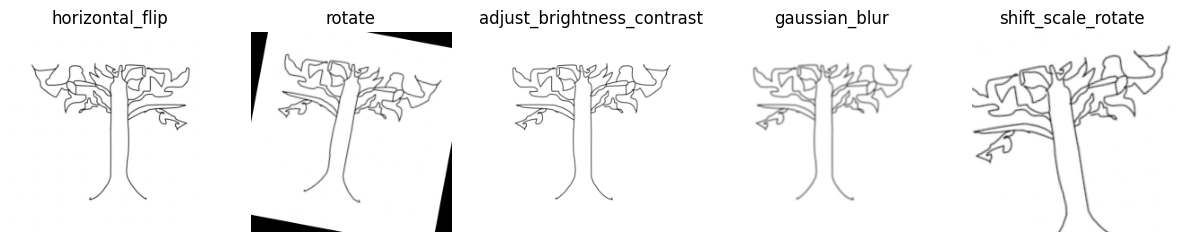

In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Sample image from your dataset
sample_image = train_images[0]  # Assuming `train_images` is defined

# Define augmentation functions with adjusted parameters
def horizontal_flip(image):
    return cv2.flip(image, 1)

def rotate(image, angle=None):
    if angle is None:
        angle = np.random.uniform(-30, 30)  # Reduced to -30 to 30 degrees
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h))

def adjust_brightness_contrast(image, alpha=None, beta=None):
    if alpha is None:
        alpha = np.random.uniform(0.9, 1.1)  # Reduced to 0.9 to 1.1 for subtle contrast changes
    if beta is None:
        beta = np.random.randint(-30, 30)    # Reduced to -30 to 30 for more controlled brightness
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def gaussian_blur(image):
    ksize = np.random.choice([3, 5])  # Limited to 3 and 5 to prevent heavy blurring
    return cv2.GaussianBlur(image, (ksize, ksize), 0)

def shift_scale_rotate(image, shift_x=None, shift_y=None, scale=None, angle=None):
    (h, w) = image.shape[:2]
    if angle is None:
        angle = np.random.uniform(-15, 15)  # Keep within a small range
    if shift_x is None:
        shift_x = np.random.uniform(-0.1, 0.1)  # Reduced shift for better object preservation
    if shift_y is None:
        shift_y = np.random.uniform(-0.1, 0.1)  # Reduced shift for better object preservation
    if scale is None:
        scale = np.random.uniform(0.9, 1.5)  # Restricted to avoid extreme resizing

    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    M[0, 2] += shift_x * w
    M[1, 2] += shift_y * h
    return cv2.warpAffine(image, M, (w, h))

# Apply and display each transformation
transformations = [
    horizontal_flip,
    rotate,
    adjust_brightness_contrast,
    gaussian_blur,
    shift_scale_rotate
]

fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, transform in enumerate(transformations):
    augmented = transform(sample_image)
    axs[i].imshow(cv2.cvtColor(augmented, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
    axs[i].axis('off')
    axs[i].set_title(transform.__name__)

plt.show()


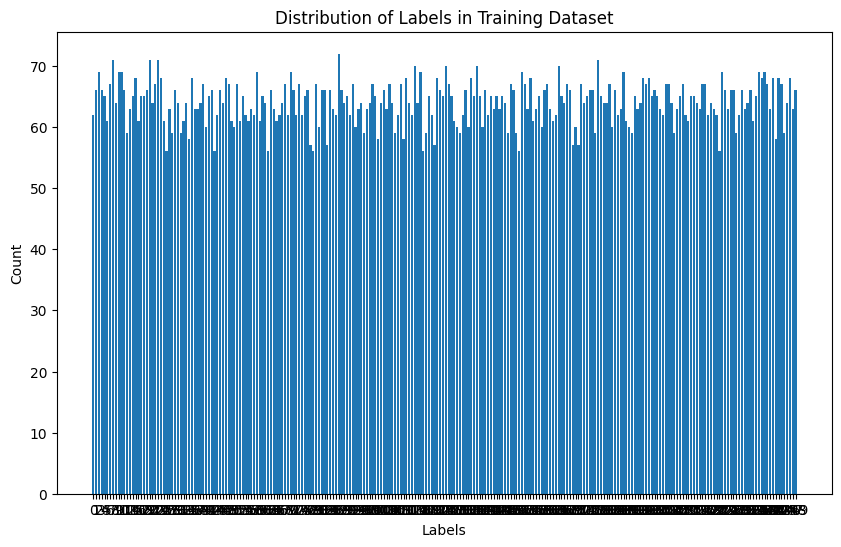

In [22]:
import matplotlib.pyplot as plt

# Assuming cleaned_distribution is a dictionary with label counts
# Example: cleaned_distribution = {0: 5000, 1: 3000, 2: 2500, ...}

# Plot histogram
labels = list(cleaned_distribution.keys())
counts = list(cleaned_distribution.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, width=0.8, align='center')
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Distribution of Labels in Training Dataset")
plt.xticks(labels)  # Show all labels on x-axis
plt.show()



In [14]:
from PIL import Image
import numpy as np
import os, time
import torch
from torchvision import datasets, transforms, models


net = models.resnet18(pretrained=True)
# Convert model to grayscale
net.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Update the fully connected layer based on the number of classes in the dataset
net.fc = torch.nn.Linear(net.fc.in_features, 250)



c:\ProgramData\Anaconda\envs\deeplearning\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\Anaconda\envs\deeplearning\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Hoyath Personal/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 31.4MB/s]


In [15]:
print(net)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [17]:
model = models.vgg19(weights=None)




In [18]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd